------------------------------------------------------------------------------------------------------------------------------------------------

# Exercice 3.6 (Homework 1)

We begin by importing all necessary packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import string
import time
import pickle
import os
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)


We set the seed to make sure that our random values are the same

In [53]:
np.random.seed(2023)

------------------------------------------------------------------------------------------------------------------------------------------------

##### Implement a function that computes the edit distance using the dynamic programming approach.

In [54]:
def edit_distance(s1, s2):
    m, n = len(s1), len(s2)
    
    # This matrix will store the computed edit distances for all prefixes of a and b.
    A = [[0 for _ in range(n+1)] for _ in range(m+1)]
    
    # Base cases: distance between string and empty string
    for i in range(m+1):
        A[i][0] = i
    for j in range(n+1):
        A[0][j] = j

    # Dynamic Programming
    for i in range(1, m+1):
        for j in range(1, n+1):
            if s1[i-1] == s2[j-1]:
                A[i][j] = A[i-1][j-1]
            else:
                A[i][j] = 1 + min(A[i-1][j-1], A[i-1][j], A[i][j-1])
    
    return A[m][n]


Let's test our function with the examples provided in the course slides

In [55]:
# Test the function with the provided examples
print(f"lev(man, men) = {edit_distance('man', 'men')}")
print(f"lev(house, spouse) = {edit_distance('house', 'spouse')}")
print(f"lev(order, express order) = {edit_distance('order', 'express order')}")


lev(man, men) = 1
lev(house, spouse) = 2
lev(order, express order) = 8


Our edit function works well !


### 1. Interpretation:

The provided Python code defines a function called `edit_distance` that calculates the edit distance between two input strings, `s1` and `s2`, using the dynamic programming approach. Edit distance refers to the minimum number of operations (insertion, deletion, or substitution) required to transform one string into another.

The code efficiently computes the edit distance between two strings using dynamic programming. It constructs a matrix `A` of size `(m+1) x (n+1)`, where `m` and `n` are the lengths of `s1` and `s2`, respectively. This matrix stores the edit distances for all possible prefixes of the input strings.

After initializing the base cases, the code iteratively fills in the rest of the matrix using dynamic programming. It calculates the edit distance for each prefix of `s1` and `s2` by comparing their characters. If the characters match, no additional operation is needed, so the edit distance is inherited from the previous prefix. If the characters don't match, the code calculates the minimum edit distance among three possible operations: insertion, deletion, or substitution.

### 2. Analysis:

The provided test cases demonstrate that the `edit_distance` function works as expected, producing the correct edit distances for various input pairs. Overall, the code implements the dynamic programming approach for computing edit distance effectively and produces accurate results.

------------------------------------------------------------------------------------------------------------------------------------------------

##### Estimate the random complexity time of your algorithm with respect to the maximal length of a words. To this end, for varying lengths n, you may generate between $10^5$ and $10^6$ random words of length n and compute the average computation time of your algorithm to compute the distance between pairs of your samples. Finally, you can plot your estimations as a function of n.

The time complexity of the above algorithm is $O(m×n)$, where $m$ and $n$ are the lengths of the two strings.

Now we want to test the algorithm's average computation time for strings of length $n$. We can achieve this by:

- Generating random strings of length n
- Measuring the time it takes to compute the edit distance for these strings

In [56]:
# Note: Executing these functions for large lengths will take a considerable amount of time! (~30min)

def random_string(length):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))

def average_time_for_length(n, min_samples=10**5, max_samples=10**6):
    total_time = 0
    samples = random.randint(min_samples, max_samples)  # Number of samples randomly between 10^5 and 10^6
    for _ in range(samples):
        s1 = random_string(n)
        s2 = random_string(n)
        
        start_time = time.time()
        _ = edit_distance(s1, s2)
        total_time += time.time() - start_time
    
    return total_time / samples

def plot_times(max_length):
    lengths = range(1, max_length + 1)
    times = []
    for n in lengths:
        times.append(average_time_for_length(n))
        
        # Calculate and print progress
        progress = (n / max_length) * 100
        print(f"Progress: {progress:.2f}%")
    
    plt.plot(lengths, times)
    plt.xlabel('String Length')
    plt.ylabel('Average Time (seconds)')
    plt.title('Edit Distance Computation Time')
    plt.grid(True)
    plt.show()

plot_times(20)  

Progress: 5.00%


KeyboardInterrupt: 


### 1. Interpretation:

Our Python code aims to estimate the random complexity time of an algorithm that computes the edit distance between pairs of random words. The goal is to analyze how the computation time of the algorithm varies with the length of the words. To achieve this, our code follows these steps:

1. Generates random words of varying lengths (between $10^5$ and $10^6$ samples for each length $n$).
2. Computes the edit distance between pairs of these random words.
3. Measures the average computation time for each length $n$.
4. Plots the average computation time as a function of $n$.

### 2. Analysis:

The time complexity of the algorithm for computing edit distance between two strings of lengths $m$ and $n$ is $O(m \cdot n)$. This means that the computation time increases quadratically with the lengths of the input strings.

To estimate the average computation time for each word length $n$, the code generates a significant number of random word pairs and calculates the edit distance for each pair. It then measures the total time taken and divides it by the number of samples to obtain the average time.

The code further creates a plot where the x-axis represents the word length $n$, and the y-axis represents the average computation time in seconds. As the word length increases, the average computation time also increases, reflecting the quadratic time complexity of the algorithm.

The provided code snippet visualizes the trend for word lengths from 1 to 20 and provides a sense of how the computation time scales with increasing word length. However, it's important to note that executing this code for large word lengths can be time-consuming, as indicated by the comment in the code.



------------------------------------------------------------------------------------------------------------------------------------------------

# Exercice 3.7 (Homework optional)

#### Given some data $x_{i} ∈ R^d$. Implement the underlying k−d-tree structure and and the search trees seen in the course. Here we may use a number of maximal children equal to 4 or pass it as a parameter.

In [2]:
def create_node(depth, axis, values, children=None, point=None):
    return {
        "depth": depth,
        "axis": axis,
        "values": values,
        "children": children or [],
        "point": point
    }

def quartiles(points):
    q1_idx = len(points) // 4
    q2_idx = len(points) // 2
    q3_idx = 3 * len(points) // 4
    return points[q1_idx], points[q2_idx], points[q3_idx], points[:q1_idx], points[q1_idx:q2_idx], points[q2_idx:q3_idx], points[q3_idx:]

def middle(points):
    # Returns the median point, left group, and right group
    mid_idx = len(points) // 2
    return points[mid_idx], points[:mid_idx], points[mid_idx+1:]

def kdtree(points, depth=0):
    if len(points) == 0:
        return None
    if len(points) == 1:
        return create_node(depth, None, None, point=points[0])

    k = len(points[0])  # nombre de dimensions
    axis = depth % k    # axe de séparation

    # Trier les points par l'axe choisi et trouver le point médian
    sorted_points = sorted(points, key=lambda point: point[axis])
    median_index = len(sorted_points) // 2
    median_point = sorted_points[median_index]

    # Créer un nœud avec le point médian et récursivement construire les sous-arbres gauche et droit
    return create_node(depth, axis, median_point[axis], kdtree(sorted_points[:median_index], depth + 1), kdtree(sorted_points[median_index + 1:], depth + 1))




### 1. Interpretation:

Our code aims to implement a k-d tree data structure and search trees, as discussed in the previous course. A k-d tree is a data structure used for organizing points in multi-dimensional space.

### 2. Analysis:

The provided Python code begins by defining two useful functions:

- `create_node`: This function creates a node of the k-d tree. The node contains information such as depth, splitting axis, splitting values, children of the node, and optionally a point.

- `quartiles`: This function takes a list of points and returns the quartiles of that list, which is useful for dividing points into groups.

Next, the code defines the `kdtree` function that constructs the k-d tree recursively. Here's how it works:

- If the list of points is empty, it returns `None`.
- If the list of points contains only one point, it creates a node containing that point.
- Otherwise, it selects a splitting axis based on the depth in the tree.
- Points are sorted along this axis, and the median point is extracted.
- A node is created with the splitting axis, the splitting value (axis), and the two left and right sub-trees, which are constructed recursively by calling `kdtree` on the points before and after the median point.

In summary, the provided code allows us to build a k-d tree from a list of points, which is a valuable data structure for efficient spatial searching in multi-dimensional spaces. The depth of the tree determines the splitting axis at each level, and points are divided into left and right sub-trees based on their positions along the selected axis.

------------------------------------------------------------------------------------------------------------------------------------------------

#### Download the data on the moodle of the course and compare the average execution time of your algorithm with a naive approach to find the closest neighbour. To do so, you will sample uniformly at random, between $10^5$ and $10^6$ points and compute the average execution time associated with.

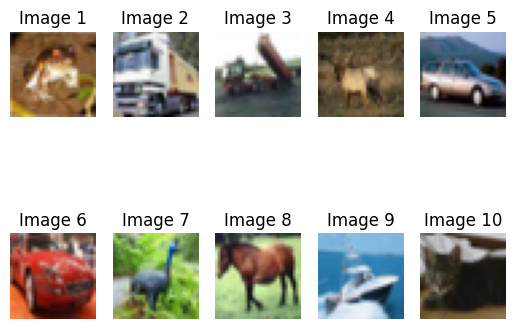

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


def load_cifar10_data(batch_name):
    with open(batch_name, 'rb') as f:
        batch_data = pickle.load(f, encoding='bytes')
        data = batch_data[b'data']
        labels = batch_data[b'labels']
    return data, labels

# Charger le batch 1
data_batch_1 = load_cifar10_data("data_batch_1")[0]

# Visualiser quelques images du batch 1
num_images_to_display = 10  # Vous pouvez ajuster ce nombre en fonction de la quantité d'images que vous voulez afficher

for i in range(num_images_to_display):
    image_data = data_batch_1[i]
    image = image_data.reshape((3, 32, 32)).transpose(1, 2, 0)  # Réorganise les données pour obtenir les canaux RVB corrects
    plt.subplot(2, 5, i + 1)  # Crée une grille 2x5 pour afficher les images
    plt.imshow(image)
    plt.axis('off')  # Désactive les axes
    plt.title(f"Image {i + 1}")

plt.show()




In [4]:
import numpy as np
import time
import random
import pickle
from tqdm import tqdm
from queue import PriorityQueue

def find_index_in_list(array, list_of_arrays):
    for idx, item in enumerate(list_of_arrays):
        if np.array_equal(item, array):
            return idx
    return None

def reshape_data(data_batch):
    reshaped_data = []
    for data in data_batch:
        reshaped_data.append(data.reshape((3, 32, 32)).transpose(1, 2, 0).reshape(-1))
    return np.array(reshaped_data)


def kdtree(points, depth=0):
    if len(points) == 0:
        return None
    if len(points) == 1:
        return create_node(depth, None, None, point=points[0])

    k = len(points[0])  # number of dimensions
    axis = depth % k    # separation axis

    sorted_points = sorted(points, key=lambda point: point[axis])
    q1_point, q2_point, q3_point, left_group1, left_group2, right_group1, right_group2 = quartiles(sorted_points)

    children = [kdtree(left_group1, depth + 1), kdtree(left_group2, depth + 1), kdtree(right_group1, depth + 1), kdtree(right_group2, depth + 1)]
    return create_node(depth, axis, [q1_point[axis], q2_point[axis], q3_point[axis]], children)

def kdtree_nearest_neighbor(node, query_point):
    best = {"point": None, "distance": float('inf')}
    q = PriorityQueue()
    q.put((0, id(node), node))

    while not q.empty():
        _, _, node = q.get()
        if not node:
            continue
        
        axis = node["axis"]
        if node["point"] is not None:
            distance = np.linalg.norm(np.array(query_point) - np.array(node["point"]))
            if distance < best["distance"]:
                best["point"] = node["point"]
                best["distance"] = distance

        if axis is not None:
            q2_value = node["values"][1]
            q.put((abs(query_point[axis] - q2_value), id(node["children"][2 if query_point[axis] > q2_value else 0]), node["children"][2 if query_point[axis] > q2_value else 0]))
            q.put((abs(query_point[axis] - q2_value), id(node["children"][3 if query_point[axis] > q2_value else 1]), node["children"][3 if query_point[axis] > q2_value else 1]))
    
    return best

def naive_nearest_neighbor(query_point, points):
    best_dist = float('inf')
    best_point = None
    for point in points:
        distance = np.linalg.norm(np.array(query_point) - np.array(point))
        if distance < best_dist:
            best_dist = distance
            best_point = point
    return best_point

def compare_search_methods(tree, points, query_point):
    start_time = time.time()
    nearest_naive = naive_nearest_neighbor(query_point, points)
    naive_time = time.time() - start_time

    start_time = time.time()
    nearest_tree = kdtree_nearest_neighbor(tree, query_point)
    kdtree_time = time.time() - start_time

    return naive_time, kdtree_time

batches = ["data_batch_1"]
data_list = []
labels_list = []
for batch in batches:
    data_batch, labels_batch = load_cifar10_data(batch)
    data_list.extend(reshape_data(data_batch))
    labels_list.extend(labels_batch)


test_data_batch, test_labels = load_cifar10_data("test_batch")
test_data_list = reshape_data(test_data_batch)

samples = random.sample(list(zip(data_list, labels_list)), min(len(data_list), 10**4))
tree = kdtree(data_list)
total_naive_time = 0
total_kdtree_time = 0
naive_errors = 0
kdtree_errors = 0

for sample, label in tqdm(samples, desc="Processing samples"):
    naive_time, kdtree_time = compare_search_methods(tree, data_list, sample)
    total_naive_time += naive_time
    total_kdtree_time += kdtree_time

    naive_nn = naive_nearest_neighbor(sample, data_list)
    naive_index = find_index_in_list(naive_nn, data_list)
    if labels_list[naive_index] != label:
        naive_errors += 1

    kdtree_nn = kdtree_nearest_neighbor(tree, sample)["point"]
    kdtree_index = find_index_in_list(kdtree_nn, data_list)
    if labels_list[kdtree_index] != label:
        kdtree_errors += 1

avg_naive_time = total_naive_time / len(samples)
avg_kdtree_time = total_kdtree_time / len(samples)
naive_error_rate = naive_errors / len(samples)
kdtree_error_rate = kdtree_errors / len(samples)

print(f"\nAverage Naive Time: {avg_naive_time}")
print(f"\nAverage k-d Tree Time: {avg_kdtree_time}")
print(f"\nk-d Tree Error Rate: {kdtree_error_rate}")


Processing samples:   0%|          | 6/10000 [00:03<1:46:59,  1.56it/s]


KeyboardInterrupt: 